In [21]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [13]:
n_samples, h, w = lfw_people.images.shape
print(n_samples)
print(h)
print(w)

1288
50
37


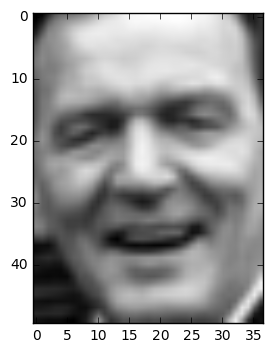

In [10]:
plt.imshow(lfw_people.images[7],cmap='gray')
plt.show()

In [11]:
lfw_people.data.shape

(1288, 1850)

In [14]:
lfw_people.target

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [15]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')

In [16]:
n_classes = lfw_people.target_names.shape[0]
n_classes

7

In [18]:
x_train,x_test,y_train,y_test = train_test_split(lfw_people.data, lfw_people.target)

In [55]:
# 'linear', 'poly', 'rbf', 'sigmoid'
model = svm.SVC(kernel='poly',class_weight='balanced')
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
predictions = model.predict(x_test)

In [57]:
target_names=lfw_people.target_names

In [58]:
print(classification_report(predictions, y_test, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.72      0.72        18
     Colin Powell       0.93      0.81      0.86        63
  Donald Rumsfeld       0.82      0.72      0.77        32
    George W Bush       0.90      0.91      0.90       134
Gerhard Schroeder       0.73      0.70      0.71        23
      Hugo Chavez       0.60      1.00      0.75        12
       Tony Blair       0.81      0.88      0.84        40

      avg / total       0.85      0.84      0.85       322



In [59]:
print(confusion_matrix(predictions, y_test, labels= range(n_classes)))

[[ 13   2   1   1   0   0   1]
 [  4  51   0   4   0   3   1]
 [  0   0  23   7   0   0   2]
 [  1   2   1 122   3   3   2]
 [  0   0   3   0  16   2   2]
 [  0   0   0   0   0  12   0]
 [  0   0   0   2   3   0  35]]


# PCA降维

In [60]:
from sklearn.decomposition import RandomizedPCA

In [61]:
# 100维度
n_components = 100

pca = RandomizedPCA(n_components=n_components, whiten=True).fit(x_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [62]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [63]:
# 特征提取
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [64]:
x_train_pca.shape

(966, 100)

In [74]:
# 'linear', 'poly', 'rbf', 'sigmoid'
model = svm.SVC(kernel='rbf',class_weight='balanced')
model.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
predictions = model.predict(x_test_pca)
print(classification_report(predictions, y_test, target_names=target_names))
print(confusion_matrix(predictions, y_test, labels= range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.95      0.70      0.81        74
  Donald Rumsfeld       0.75      0.78      0.76        27
    George W Bush       0.91      0.90      0.91       138
Gerhard Schroeder       0.68      0.75      0.71        20
      Hugo Chavez       0.50      1.00      0.67        10
       Tony Blair       0.84      0.90      0.87        40

      avg / total       0.86      0.84      0.84       322

[[ 12   1   0   0   0   0   0]
 [  4  52   3   8   1   4   2]
 [  0   0  21   3   1   0   2]
 [  2   2   1 124   2   5   2]
 [  0   0   2   1  15   1   1]
 [  0   0   0   0   0  10   0]
 [  0   0   1   0   3   0  36]]


# 调参

In [78]:
from sklearn.grid_search import GridSearchCV

In [79]:
param_grid = {'C':[0.1, 1, 10, 100, 1000, 10000],
              'gamma':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}

model = GridSearchCV(svm.SVC(kernel='rbf',class_weight='balanced'), param_grid)
model.fit(x_train_pca, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1], 'C': [0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [80]:
model.best_estimator_

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
predictions = model.predict(x_test_pca)
print(classification_report(predictions, y_test, target_names=target_names))
print(confusion_matrix(predictions, y_test, labels= range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.79      0.81        19
     Colin Powell       0.95      0.78      0.85        67
  Donald Rumsfeld       0.79      0.69      0.73        32
    George W Bush       0.90      0.97      0.93       126
Gerhard Schroeder       0.82      0.72      0.77        25
      Hugo Chavez       0.70      1.00      0.82        14
       Tony Blair       0.84      0.92      0.88        39

      avg / total       0.87      0.87      0.86       322

[[ 15   2   0   1   0   1   0]
 [  3  52   3   6   0   2   1]
 [  0   0  22   6   1   0   3]
 [  0   1   0 122   0   2   1]
 [  0   0   3   1  18   1   2]
 [  0   0   0   0   0  14   0]
 [  0   0   0   0   3   0  36]]


In [83]:
param_grid = {'C':[0.3, 0.6, 0.8, 1, 1.2, 1.4, 1.6],
              'gamma':[ 0.001, 0.003, 0.005, 0.007, 0.009, 0.01]}

model = GridSearchCV(svm.SVC(kernel='rbf',class_weight='balanced'), param_grid)
model.fit(x_train_pca, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.003, 0.005, 0.007, 0.009, 0.01], 'C': [0.3, 0.6, 0.8, 1, 1.2, 1.4, 1.6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [84]:
model.best_estimator_

SVC(C=1.4, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.007, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
predictions = model.predict(x_test_pca)
print(classification_report(predictions, y_test, target_names=target_names))
print(confusion_matrix(predictions, y_test, labels= range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.88      0.82        16
     Colin Powell       0.95      0.78      0.85        67
  Donald Rumsfeld       0.79      0.81      0.80        27
    George W Bush       0.94      0.94      0.94       136
Gerhard Schroeder       0.82      0.82      0.82        22
      Hugo Chavez       0.65      1.00      0.79        13
       Tony Blair       0.88      0.93      0.90        41

      avg / total       0.89      0.89      0.89       322

[[ 14   2   0   0   0   0   0]
 [  4  52   4   5   0   2   0]
 [  0   0  22   3   1   0   1]
 [  0   1   1 128   0   4   2]
 [  0   0   1   0  18   1   2]
 [  0   0   0   0   0  13   0]
 [  0   0   0   0   3   0  38]]


# 画图

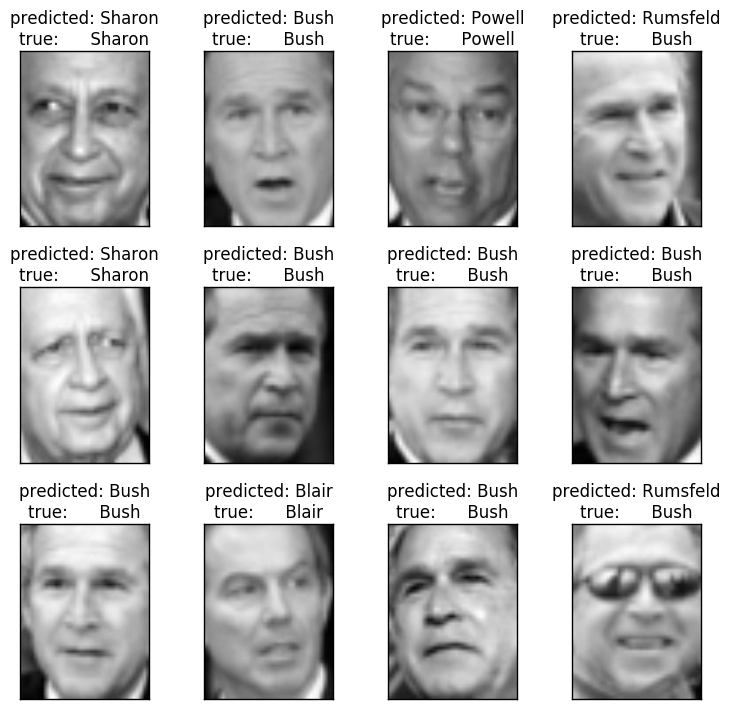

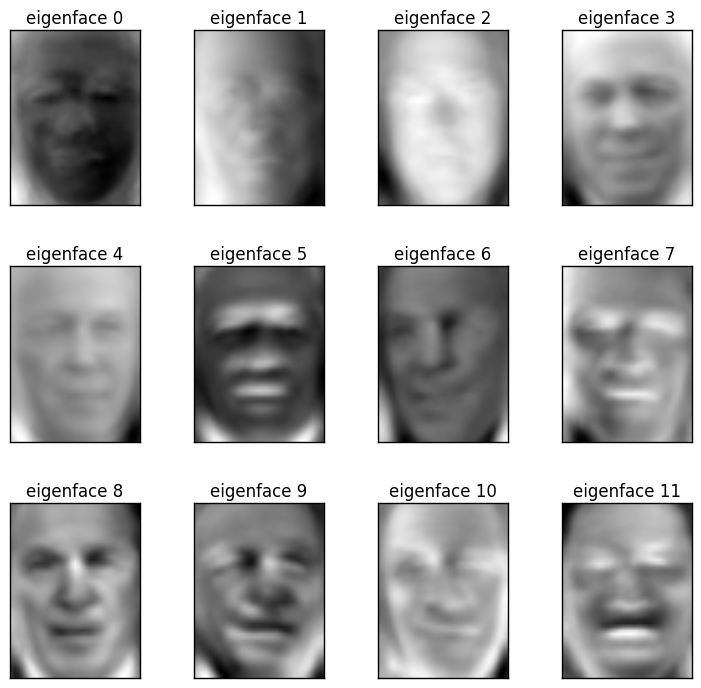

In [90]:
# 画图，3行4列
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# 获取一张图片title
def title(predictions, y_test, target_names, i):
    pred_name = target_names[predictions[i]].split(' ')[-1]
    true_name = target_names[y_test[i]].split(' ')[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

# 获取所有图片title
prediction_titles = [title(predictions, y_test, target_names, i) for i in range(predictions.shape[0])]

# 画图
plot_gallery(x_test, prediction_titles, h, w)

# 设置特征脸的title
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

# 画特征脸的图
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()